In [6]:
import pandas as pd
import numpy as np
import pickle


In [14]:
df= pd.read_csv('../data/processed/df_full.csv')
df.head(10)

,nr. sessions,total km,km Z3-4,km Z5-T1-T2,hours alternative,nr. sessions.1,total km.1,km Z3-4.1,km Z5-T1-T2.1,hours alternative.1,...,total km.5,km Z3-4.5,km Z5-T1-T2.5,hours alternative.5,nr. sessions.6,total km.6,km Z3-4.6,km Z5-T1-T2.6,hours alternative.6,Date
0,0,0.00,0.00,0.0,0.00,1.0,9.84,14.84,2.84,0.00,...,0.00,0.00,0.00,0.00,1.0,6.38,1.00,0.00,0.00,2024-08-07
1,1,6.30,10.60,0.0,0.79,0.0,0.00,0.00,0.00,0.00,...,6.18,11.36,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2024-08-08
2,0,0.00,0.00,0.0,1.48,1.0,6.30,10.60,0.00,0.79,...,12.53,24.06,0.00,0.00,1.0,6.18,11.36,0.00,0.00,2024-08-09
3,1,3.25,0.00,0.0,0.00,0.0,0.00,0.00,0.00,1.48,...,0.00,0.00,0.00,0.00,1.0,12.53,24.06,0.00,0.00,2024-08-10
4,2,12.71,15.10,5.1,0.00,1.0,3.25,0.00,0.00,0.00,...,9.84,14.84,2.84,0.00,0.0,0.00,0.00,0.00,0.00,2024-08-11
5,1,7.29,13.58,0.0,0.00,2.0,12.71,15.10,5.10,0.00,...,0.00,0.00,0.00,0.00,1.0,9.84,14.84,2.84,0.00,2024-08-12
6,0,0.00,0.00,0.0,0.00,1.0,7.29,13.58,0.00,0.00,...,6.30,10.60,0.00,0.79,0.0,0.00,0.00,0.00,0.00,2024-08-13
7,0,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,1.48,1.0,6.30,10.60,0.00,0.79,2024-08-14
8,1,10.12,19.24,0.0,0.00,0.0,0.00,0.00,0.00,0.00,...,3.25,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.48,2024-08-15
9,1,12.00,20.00,1.0,0.00,1.0,10.12,19.24,0.00,0.00,...,12.71,15.10,5.10,0.00,1.0,3.25,0.00,0.00,0.00,2024-08-16


In [15]:
def normalize_user(row, mean_df, std_df):
    mu = mean_df
    su = std_df
    z = (row - mu)/su
    return z

# Calculate the means and standard deviations of all healthy events per athlete
def getMeanStd_user(data):
    mean = data.mean()
    std = data.std()
    std.replace(to_replace=0.0, value=0.01, inplace=True)
    return mean, std

user_test_means, user_test_std = getMeanStd_user(df.copy())


# 4. Apply normalization to the *test data* using the *training* statistics
# X_test_normalized = X_test_original.drop(columns=['injury', 'Date', 'Athlete ID'], errors='ignore')
# X_test_normalized = X_test_normalized.apply(lambda x: normalize2(x, X_train_means, X_train_std, x['Athlete ID']), axis=1)
user_normalized = df.apply(lambda x: normalize_user(x, user_test_means,user_test_std), axis=1)
user_normalized = user_normalized.drop(columns=[ 'Date'], errors='ignore')


C:\Users\milo\AppData\Local\Temp\ipykernel_20636\935401076.py:9: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = data.mean()
C:\Users\milo\AppData\Local\Temp\ipykernel_20636\935401076.py:10: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  std = data.std()


In [16]:
# import the model
with open('../models/logistic_model.pkl', 'rb') as file:
    model = pickle.load(file)
# make predictions
predictions = model.predict(user_normalized)
# make probability predictions
probs = model.predict_proba(user_normalized)[:, 1]




In [19]:
# create a df of predictions using the date column from dfday_user and the predictions

df['injury predictions'] = predictions
df['injury probabilities'] = probs
df[['Date','injury predictions','injury probabilities']].head(30)

,Date,injury predictions,injury probabilities
0,2024-08-07,0,0.430931
1,2024-08-08,1,0.644822
2,2024-08-09,1,0.542369
3,2024-08-10,1,0.508737
4,2024-08-11,1,0.663344
5,2024-08-12,1,0.533522
6,2024-08-13,0,0.487356
7,2024-08-14,0,0.487356
8,2024-08-15,1,0.599920
9,2024-08-16,1,0.685006


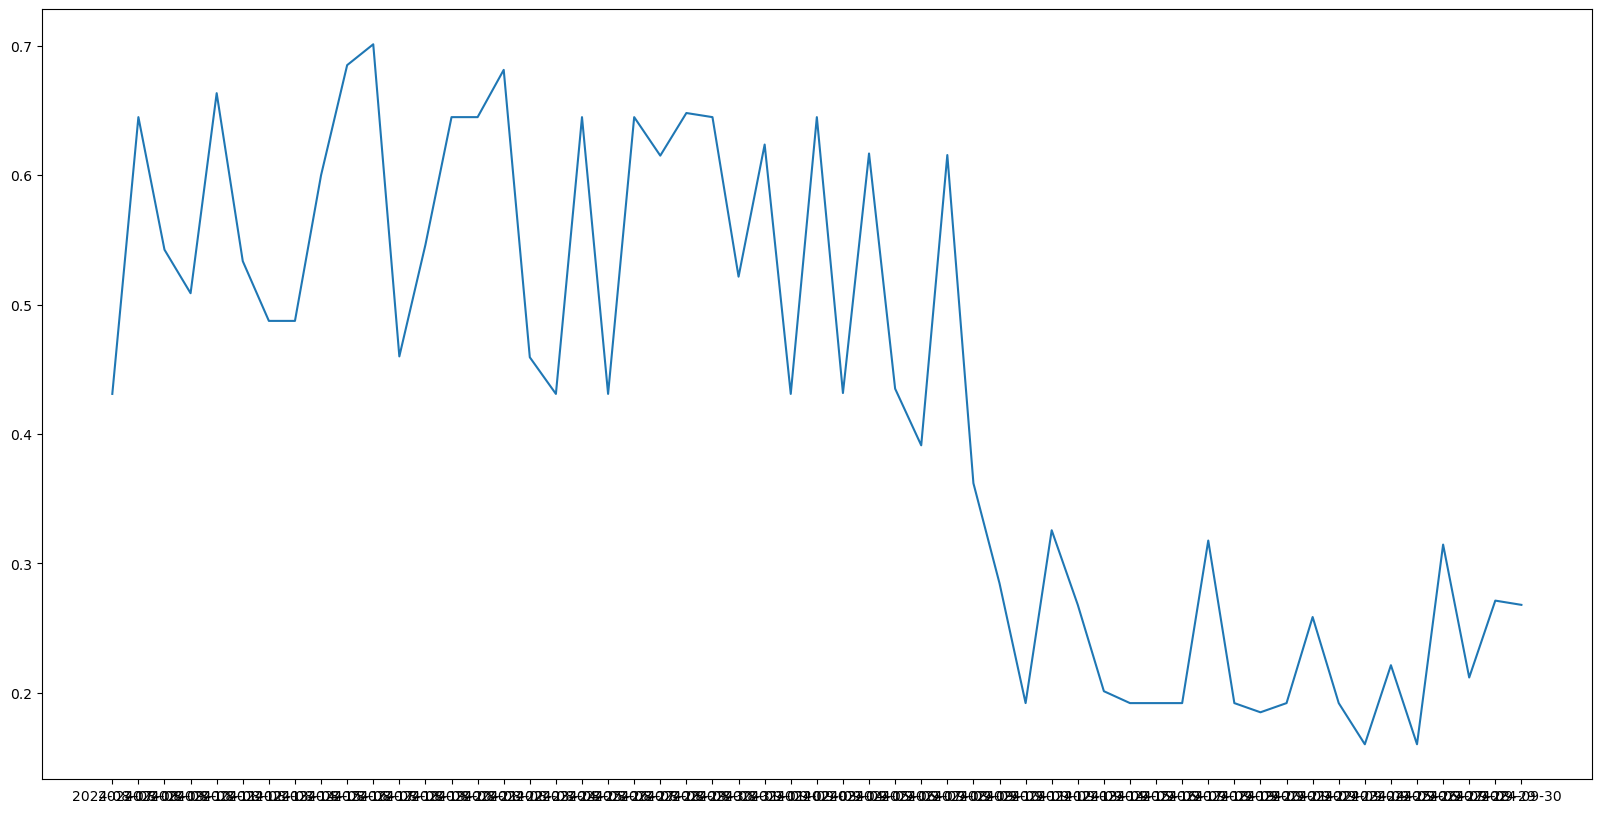

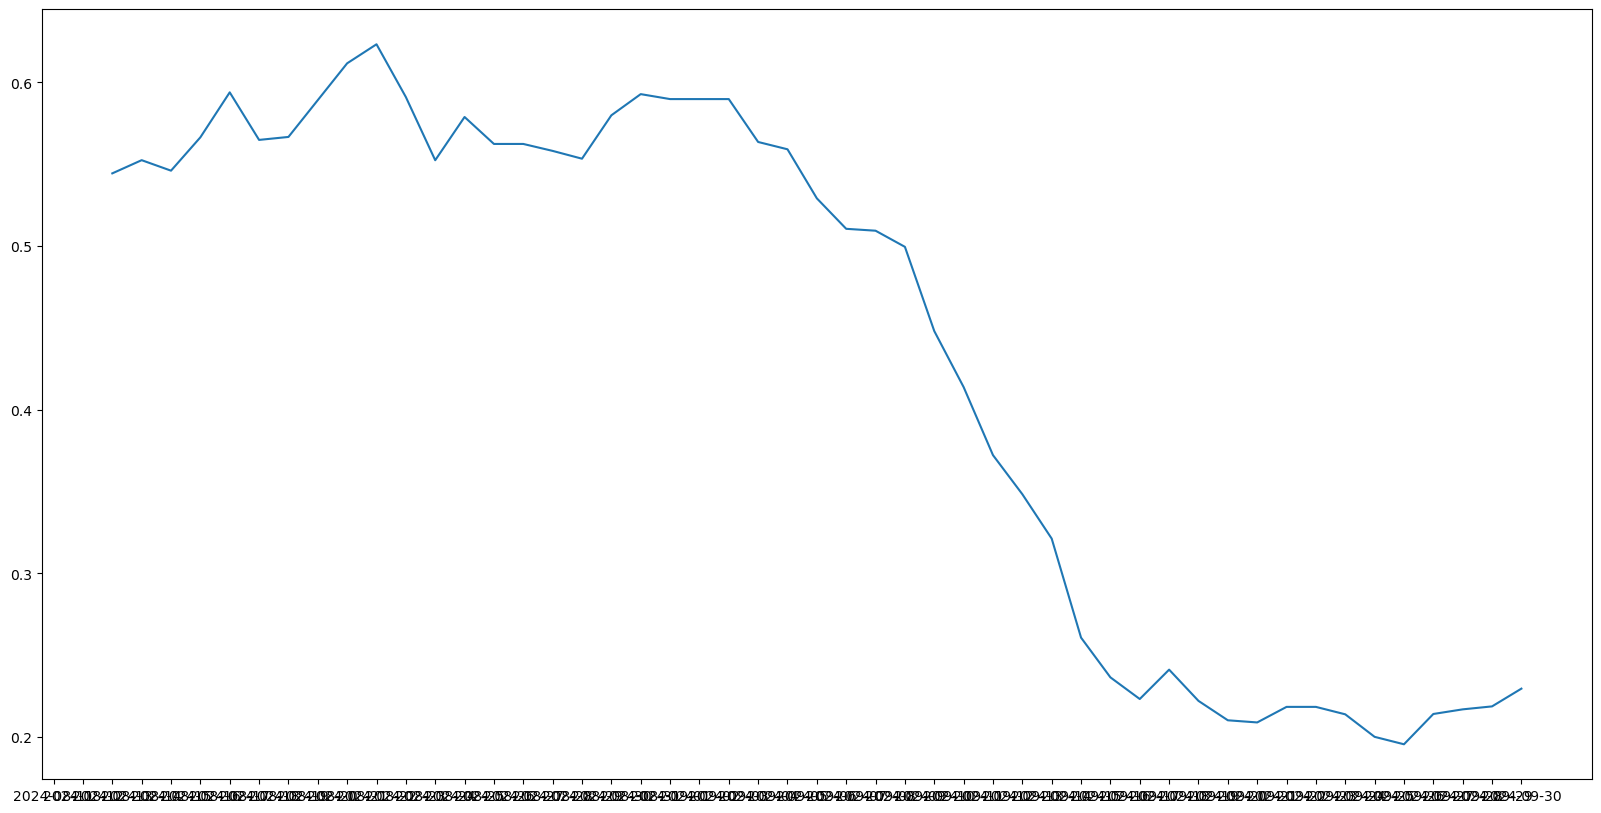

In [21]:
# plot the probabilities over time
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['injury probabilities'])
# plot the probabilities over time with a rolling mean
plt.figure(figsize=(20,10))
plt.plot(df['Date'],df['injury probabilities'].rolling(window=7).mean())